<a href="https://colab.research.google.com/github/AteevMishra/Fashion-Detector/blob/master/fashion_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#'keras' is just a high level API of tensorflow

data = keras.datasets.fashion_mnist

#to get training and testing data just write the below line -
(train_images, train_labels), (test_images,test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0


#Creating the Model----------
#1.defining sequence of layers inside 'Sequential'-

model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28) ),  #1st is the INPUT layer(flatten it),each image is 28*28 in size
    keras.layers.Dense(128,activation = "relu"),#2nd is DENSE layer(dense is another word for fully connected),we have taken 128 no. of neuros arbitrarily,'activation'=activation function,'relu'=rectified linear unit, we have taken this function arbitrat=rily but 'relu' is a very fast activation function and works very well in different situations
    keras.layers.Dense(10,activation="softmax") #3rd is OUTPUT layer ,10 neurons will give output,"softmax":it will pickup value for each neuron so that all the values add up to '1',so it means that we can look at the last layer and know what the network thinks about probability of each class
    ])

#2.setting up parameters for our model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"]) #"adam" is a standard optimizer,"loss" = name of loss/cost function used,3rd defines we are looking for "accuracy"

#Train our model--------------
model.fit(train_images,train_labels,epochs = 10, validation_data =(test_images, test_labels)) #'epoch' defines how many times the model is gonna see the information(first 2 parameters in this function),it randomly picks images and labels corresponding to each other,and feed that to the neural network; increasing the no. of 'epochs' does not necessarily increase the accuracy,it's something you have to play with

model.save('fashiond.model')
#Evaluation/Testing the model
#test_loss, test_acc = model.evaluate(test_images, test_labels)

#print("Tested Accuracy : ",test_acc)#To see accuracy of our model   




Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4973 - accuracy: 0.8249 - val_loss: 0.4195 - val_accuracy: 0.8498
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3730 - accuracy: 0.8661 - val_loss: 0.3862 - val_accuracy: 0.8579
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3370 - accuracy: 0.8768 - val_loss: 0.3793 - val_accuracy: 0.8613
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3116 - accuracy: 0.8852 - val_loss: 0.3533 - val_accuracy: 0.8716
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.8921 - val_loss: 0.3467 - val_accuracy: 0.8753
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2757 - accuracy: 0.8975 - val_loss: 0.3662 - val_accuracy: 0.8696
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2648 - accuracy: 0.9024 - val_loss: 0.3310 - val_accuracy:

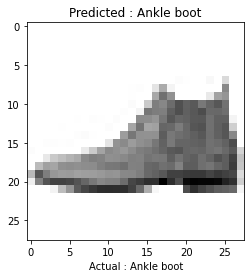

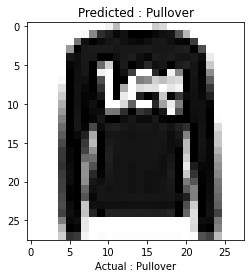

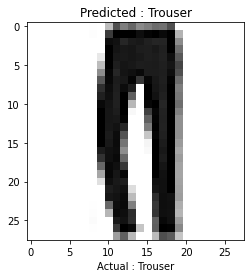

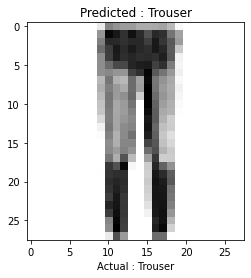

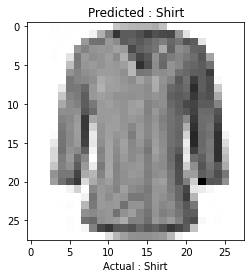

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('fashiond.model')

prediction = model.predict(test_images)
for i in range(5):
  #plt.grid(True)
  plt.imshow(test_images[i],cmap = plt.cm.binary)
  plt.xlabel('Actual : '+ class_names[test_labels[i]])
  plt.title('Predicted : ' + class_names[np.argmax(prediction[i])])
  plt.show()
